# Data Preparation and EDA.  Model Building and Evaluation

In [1]:
#supress warnings

import warnings
warnings.filterwarnings('ignore')

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [12]:
df = pd.read_csv('day.csv')

In [7]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [18]:
# describing columnsof data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
df.shape

(730, 16)

In [17]:
# provide info abpput columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [19]:
# check null values in columns

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [20]:
# modifying header column names for better understandign as part of data clean activity
df.rename(columns={'yr':'year','mnth':'month','temp':'temperature','hum':'humidity'}, inplace=True)

In [21]:
# verify the changes

df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [26]:
# removing duplicates

df_copy = df.copy()

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
df_copy.shape

(730, 12)

In [27]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [28]:
#encoding columns for better EDA

df.season = df.season.map({1:'spring', 2:'summer', 3:'autumn', 4:'winter'})
df.month = df.month.map({1:'january',2:'february',3:'march',4:'april',5:'may',6:'june',7:'july',8:'august',9:'september',10:'october',11:'november',12:'december'})
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df.weathersit = df.weathersit.map({1:'Clear',2:'Cloudy',3:'Light_rain',4:'Heavy_rain'})

In [29]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,cnt
0,spring,0,january,0,sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   year         730 non-null    int64  
 2   month        730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   temperature  730 non-null    float64
 8   atemp        730 non-null    float64
 9   humidity     730 non-null    float64
 10  windspeed    730 non-null    float64
 11  cnt          730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Data Visualization

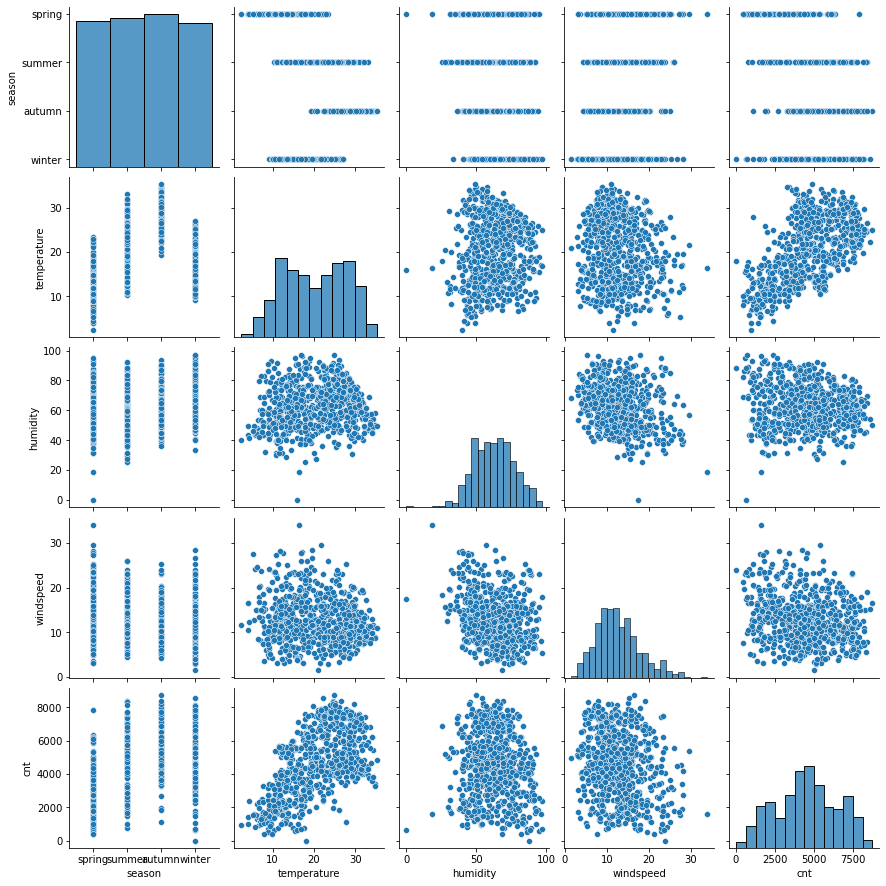

In [39]:
sns.pairplot(df, vars=['season','temperature','humidity','windspeed',"cnt"])
plt.show()

### HeatMaps

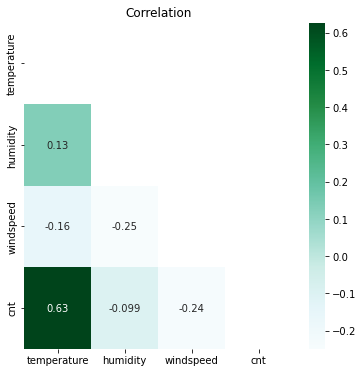

In [49]:
#correlation
plt.figure(figsize = (6,6))
matrix = np.triu(df[['temperature','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temperature','humidity','windspeed','cnt']].corr(), annot = True, cmap="BuGn", mask=matrix)
plt.title("Correlation")
plt.show()

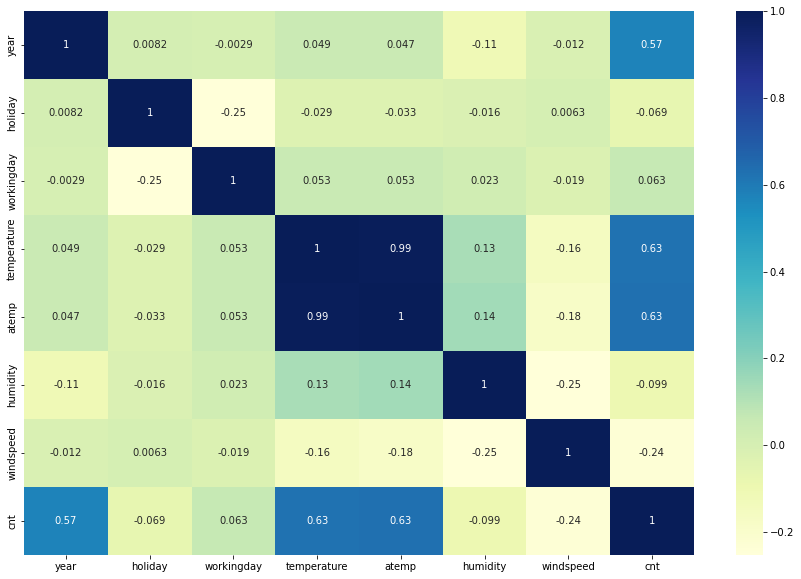

In [45]:
#Correlation 2

cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

### BoxPlot

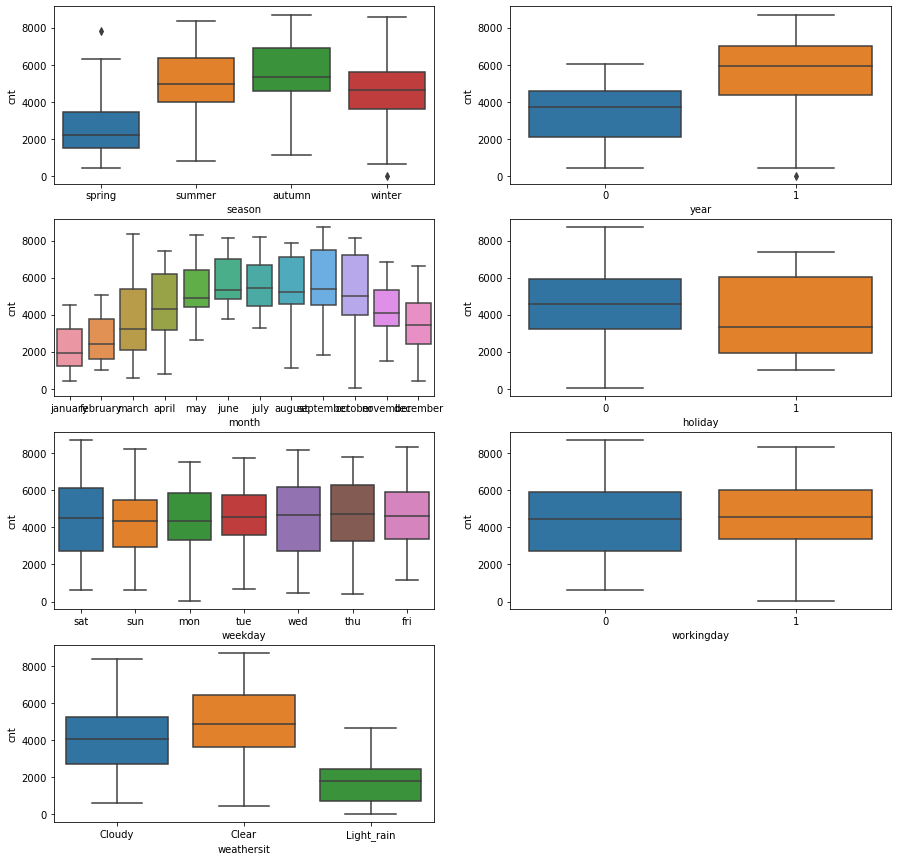

In [61]:
vars_cat = ['season','year','month','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

In [62]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,cnt
0,spring,0,january,0,sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   year         730 non-null    int64  
 2   month        730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   temperature  730 non-null    float64
 8   atemp        730 non-null    float64
 9   humidity     730 non-null    float64
 10  windspeed    730 non-null    float64
 11  cnt          730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Dummy variabe creation and mergign with main dataframe

In [115]:
# Dummy variables created and merged.

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)


In [116]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,cnt
0,spring,0,january,0,sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [117]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [118]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   year         730 non-null    int64  
 2   month        730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   temperature  730 non-null    float64
 8   atemp        730 non-null    float64
 9   humidity     730 non-null    float64
 10  windspeed    730 non-null    float64
 11  cnt          730 non-null    int64  
 12  august       730 non-null    uint8  
 13  december     730 non-null    uint8  
 14  february     730 non-null    uint8  
 15  january      730 non-null    uint8  
 16  july         730 non-null    uint8  
 17  june         730 non-null    uint8  
 18  march        730 non-null    uint8  
 19  may     

In [119]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,...,sat,sun,thu,tue,wed,Cloudy,Light_rain,spring,summer,winter
0,spring,0,january,0,sat,0,Cloudy,14.110847,18.18125,80.5833,...,1,0,0,0,0,1,0,1,0,0
1,spring,0,january,0,sun,0,Cloudy,14.902598,17.68695,69.6087,...,0,1,0,0,0,1,0,1,0,0
2,spring,0,january,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,january,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,january,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [120]:
df_new.shape

(730, 34)

In [121]:
df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [122]:
df_new.head()

,year,holiday,workingday,temperature,atemp,humidity,windspeed,cnt,august,december,...,sat,sun,thu,tue,wed,Cloudy,Light_rain,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [123]:
df_new.shape

(730, 30)

In [124]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   temperature  730 non-null    float64
 4   atemp        730 non-null    float64
 5   humidity     730 non-null    float64
 6   windspeed    730 non-null    float64
 7   cnt          730 non-null    int64  
 8   august       730 non-null    uint8  
 9   december     730 non-null    uint8  
 10  february     730 non-null    uint8  
 11  january      730 non-null    uint8  
 12  july         730 non-null    uint8  
 13  june         730 non-null    uint8  
 14  march        730 non-null    uint8  
 15  may          730 non-null    uint8  
 16  november     730 non-null    uint8  
 17  october      730 non-null    uint8  
 18  september    730 non-null    uint8  
 19  mon     

## Splitting the data

In [125]:
# 70:30 split
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [126]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [175]:
scaler = MinMaxScaler()

In [176]:
df_train.head()

,year,holiday,workingday,temperature,atemp,humidity,windspeed,august,december,february,...,sat,sun,thu,tue,wed,Cloudy,Light_rain,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,1,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,0,1,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [129]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         510 non-null    int64  
 1   holiday      510 non-null    int64  
 2   workingday   510 non-null    int64  
 3   temperature  510 non-null    float64
 4   atemp        510 non-null    float64
 5   humidity     510 non-null    float64
 6   windspeed    510 non-null    float64
 7   cnt          510 non-null    int64  
 8   august       510 non-null    uint8  
 9   december     510 non-null    uint8  
 10  february     510 non-null    uint8  
 11  january      510 non-null    uint8  
 12  july         510 non-null    uint8  
 13  june         510 non-null    uint8  
 14  march        510 non-null    uint8  
 15  may          510 non-null    uint8  
 16  november     510 non-null    uint8  
 17  october      510 non-null    uint8  
 18  september    510 non-null    uint8  
 19  mon   

In [131]:
# Apply scaler() to all the columns except the 'yes/no' and 'dummy' variables

num_vars = ['temperature','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [132]:
df_train.head()

,year,holiday,workingday,temperature,atemp,humidity,windspeed,cnt,august,december,...,sat,sun,thu,tue,wed,Cloudy,Light_rain,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,1,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,1,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,1,0,0,1,0


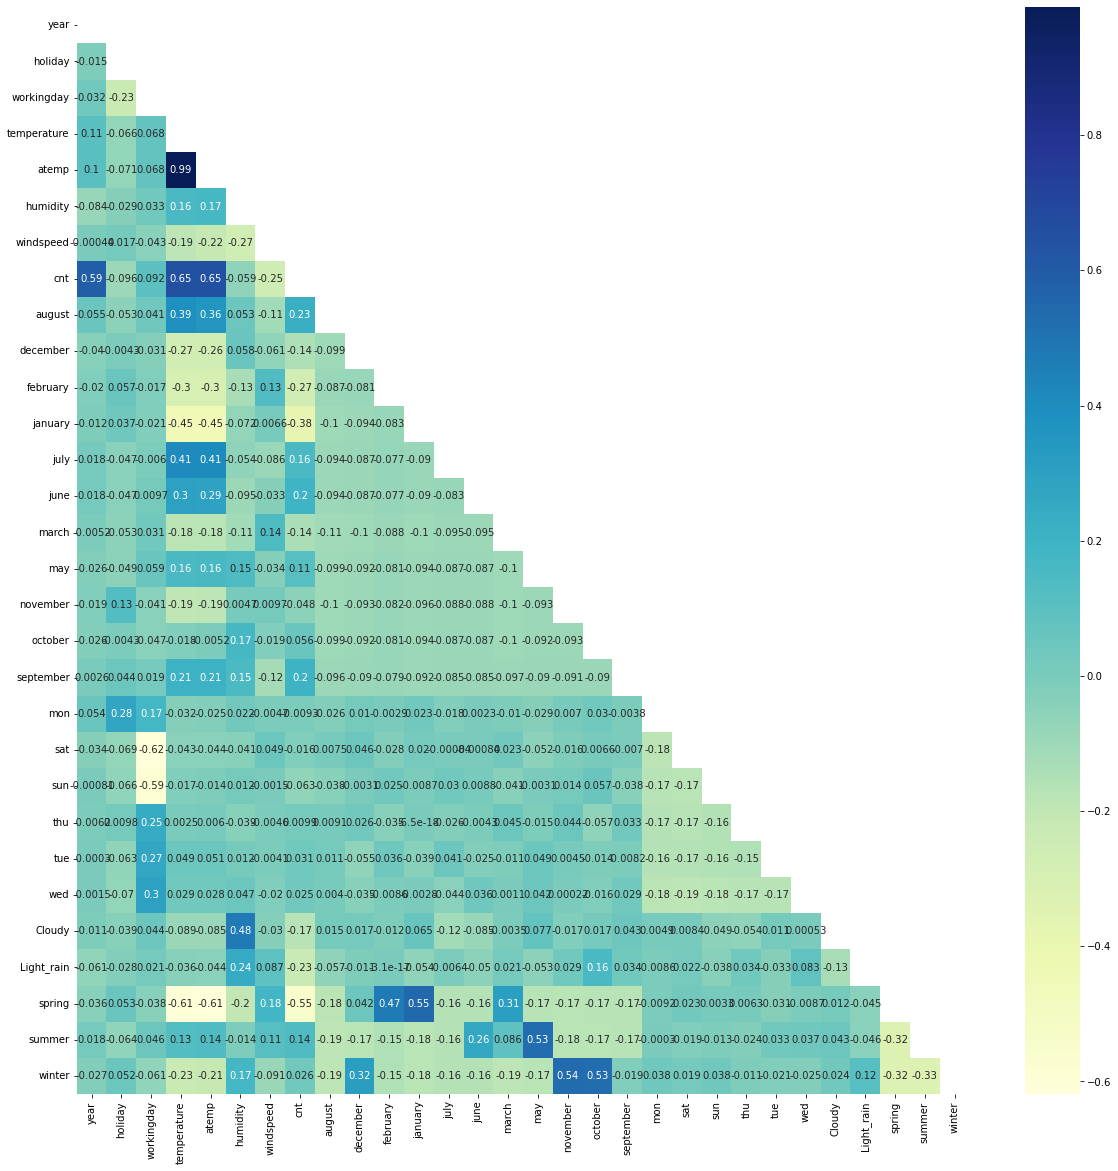

In [133]:
# check correlation coefficients

plt.figure(figsize = (20,20))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu", mask=matrix)
plt.show()

### Correlation Observations

#### Cloudy and Humidity has correlation.  Spring with Jan, Feb. Winter with November,october. Spring with Jan, Feb. cnt with year and temperature show good correlation

### Build Linear Regression Model

In [134]:
y_train = df_train.pop('cnt')
X_train = df_train

In [135]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [136]:
X_train.shape

(510, 29)

In [137]:
y_train.shape

(510,)

In [112]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [138]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temperature', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('august', False, 7),
 ('december', False, 3),
 ('february', False, 4),
 ('january', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('march', False, 15),
 ('may', False, 6),
 ('november', False, 2),
 ('october', False, 13),
 ('september', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Cloudy', True, 1),
 ('Light_rain', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [139]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temperature', 'humidity', 'windspeed',
       'january', 'july', 'september', 'sat', 'Cloudy', 'Light_rain', 'spring',
       'summer', 'winter'],
      dtype='object')


In [140]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'august', 'december', 'february', 'june', 'march', 'may',
       'november', 'october', 'mon', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [141]:
# Calculate VIF

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [142]:
X_train_rfe = X_train[col]

In [143]:
# calculated value of VIF

calculateVIF(X_train_rfe)

,Features,VIF
4,humidity,29.37
3,temperature,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
10,Cloudy,2.29
0,year,2.09
9,sat,1.98


### VIF observation

#### humidity has highest VIF value

In [144]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.22e-191
Time:                        19:49:46   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2519      0.036      6.969      

In [146]:
# january has high P value. SO drop January

X_train_new = X_train_rfe.drop(['january'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
4,humidity,28.46
3,temperature,16.98
2,workingday,5.28
5,windspeed,4.72
11,spring,4.24
13,winter,3.42
12,summer,2.85
9,Cloudy,2.29
0,year,2.08
8,sat,1.97


In [147]:
#Still humidity shows high VF value. So dropping humidity.
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temperature,6.97
2,workingday,5.20
4,windspeed,4.65
10,spring,2.49
11,summer,2.34
0,year,2.07
12,winter,1.98
7,sat,1.96
5,july,1.58
8,Cloudy,1.57


In [148]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.28e-188
Time:                        19:57:00   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1576      0.031      5.126      

In [149]:
#holiday has high P value. So dropping holiday
X_train_new = X_train_new.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temperature,6.73
1,workingday,4.66
3,windspeed,4.64
9,spring,2.38
10,summer,2.32
0,year,2.07
11,winter,1.91
6,sat,1.83
4,july,1.58
7,Cloudy,1.57


In [151]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          7.12e-189
Time:                        20:01:15   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1492      0.031      4.881      

In [152]:
# July has high p-value. So dropping it.
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temperature,5.48
1,workingday,4.66
3,windspeed,4.64
8,spring,2.30
0,year,2.07
9,summer,2.00
5,sat,1.83
10,winter,1.76
6,Cloudy,1.57
4,september,1.23


In [153]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.42e-188
Time:                        20:03:51   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1406      0.031      4.597      

### Now 4th linear regression model lr_4 is showing good VIF valued variables and significant P-values

### with P value 1.42e-188 is almost near to zero in this lr_4 model

# Analysis and Validation

In [154]:
X_train_lm_4

,const,year,workingday,temperature,windspeed,september,sat,Cloudy,Light_rain,spring,summer,winter
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,1,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,1,1,0,0,1,0
111,1.0,0,1,0.345824,0.380981,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,1,1,0,0,0,1
79,1.0,0,1,0.462664,0.529881,0,0,1,0,0,1,0


In [155]:
y_train_pred = lr_4.predict(X_train_lm_4)

Text(0.5, 0, 'Errors')

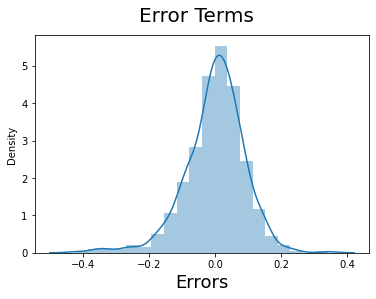

In [156]:
# Histogram for error plotting
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

### Normal distribution of error plot is observed

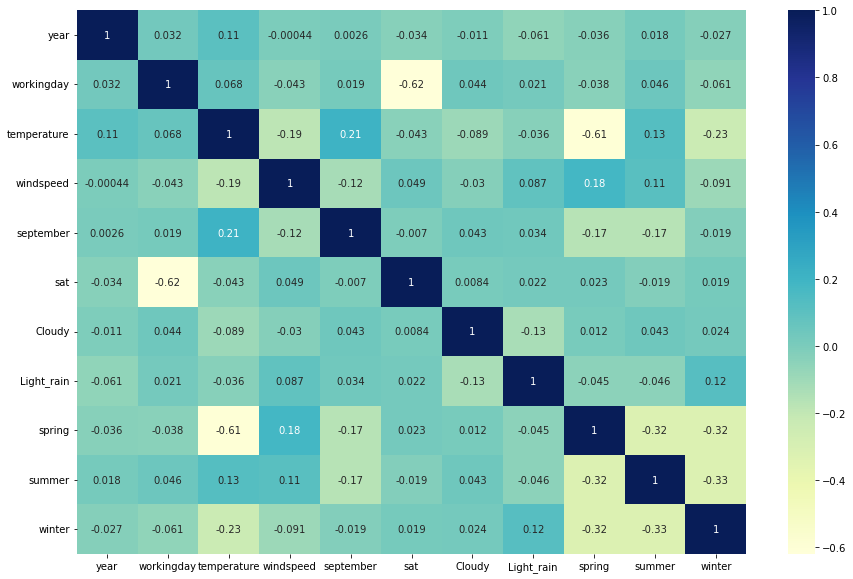

In [158]:
# collinearity of variables after proper training of the model
plt.figure(figsize=(15,10))
sns.heatmap(X_train_new.corr(),annot = True, cmap="YlGnBu")
plt.show()

## Linear Plotting

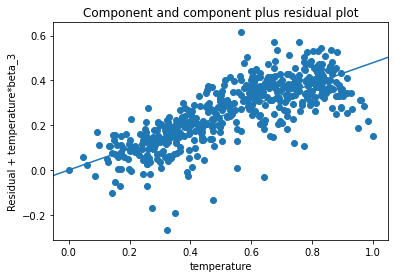

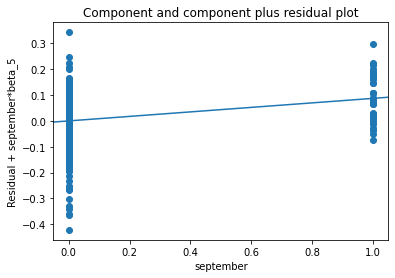

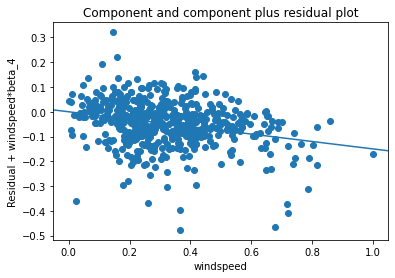

In [160]:
sm.graphics.plot_ccpr(lr_4, 'temperature')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'september')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'windspeed')
plt.show()

## Predictions with the built final model

In [161]:
num_vars = ['temperature', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temperature,atemp,humidity,windspeed,cnt,august,december,...,sat,sun,thu,tue,wed,Cloudy,Light_rain,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,1,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [162]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         220 non-null    int64  
 1   holiday      220 non-null    int64  
 2   workingday   220 non-null    int64  
 3   temperature  220 non-null    float64
 4   atemp        220 non-null    float64
 5   humidity     220 non-null    float64
 6   windspeed    220 non-null    float64
 7   cnt          220 non-null    float64
 8   august       220 non-null    uint8  
 9   december     220 non-null    uint8  
 10  february     220 non-null    uint8  
 11  january      220 non-null    uint8  
 12  july         220 non-null    uint8  
 13  june         220 non-null    uint8  
 14  march        220 non-null    uint8  
 15  may          220 non-null    uint8  
 16  november     220 non-null    uint8  
 17  october      220 non-null    uint8  
 18  september    220 non-null    uint8  
 19  mon   

In [163]:
df_test.describe()

,year,holiday,workingday,temperature,atemp,humidity,windspeed,cnt,august,december,...,sat,sun,thu,tue,wed,Cloudy,Light_rain,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.027273,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.163248,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Evaluation of Model

In [164]:
y_test = df_test.pop('cnt')
X_test = df_test

In [165]:
col1 = X_train_new.columns
X_test = X_test[col1]
X_test_lm_4 = sm.add_constant(X_test)

In [166]:
y_pred = lr_4.predict(X_test_lm_4)

In [171]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8063

# The calculated R-squared score on the test set = 0.8063

#### Plot test values with predicted values from the model


Text(0, 0.5, 'y_pred')

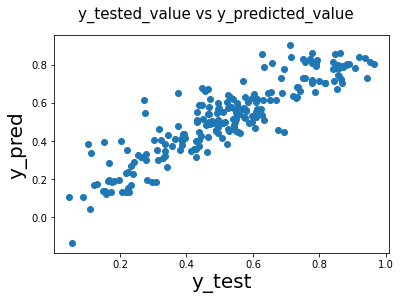

In [168]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_tested_value vs y_predicted_value', fontsize = 15) 
plt.xlabel('y_test', fontsize = 20)
plt.ylabel('y_pred', fontsize = 20)

In [172]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7961


# The calculated Adjusted R-squared score = 0.7961

In [173]:
round(lr_4.params,4)

const          0.1406
year           0.2344
workingday     0.0555
temperature    0.4796
windspeed     -0.1500
september      0.0873
sat            0.0667
Cloudy        -0.0804
Light_rain    -0.2893
spring        -0.0554
summer         0.0626
winter         0.0958
dtype: float64

# Thus as per the test data sheet - bike demand depends on : Year, Temperature, Windspeed, Light Rain, Season(Spring, Summer and Winter), Day(Workingday, Saturday)